In [62]:
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
seller = pd.read_csv("Live.csv")
seller.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [77]:
seller.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0


In [80]:
# Delete unnecessary columns
# seller = seller.drop(['Column1','Column2','Column3','Column4'], axis='columns')
seller.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [83]:
# check null value
seller.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [36]:
seller.groupby(['status_type'])['num_likes'].count()

status_type
link        63
photo     4288
status     365
video     2334
Name: num_likes, dtype: int64

In [97]:
# Change datetime format
seller['status_published'] = pd.to_datetime(seller.status_published)

In [98]:
seller['status_published'].head()

0   2018-04-22 06:00:00
1   2018-04-21 22:45:00
2   2018-04-21 06:17:00
3   2018-04-21 02:29:00
4   2018-04-18 03:22:00
Name: status_published, dtype: datetime64[ns]

In [102]:
seller[['status_id','status_type','num_reactions','num_likes']].sort_values(by='num_likes', ascending=False).head(10)

,status_id,status_type,num_reactions,num_likes
1229,246675545449582_735701483213650,photo,4710,4710
166,246675545449582_1404391233011335,photo,4410,4315
6197,819700534875473_967787160066809,photo,4315,4241
6248,819700534875473_967787160066809,photo,4315,4241
1430,246675545449582_519607534823047,video,4094,4094
6198,819700534875473_966878030157722,photo,4114,4054
6249,819700534875473_966878030157722,photo,4114,4054
1429,246675545449582_520055471444920,video,3919,3919
1341,246675545449582_579062638877536,video,3730,3730
1207,246675545449582_752441721539626,video,3639,3639


In [104]:
# Check duplicates
seller[seller.duplicated()]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6221,819700534875473_1002372733274918,video,2018-06-10 03:43:00,376,20,3,354,19,3,0,0,0
6222,819700534875473_1001982519980606,photo,2018-06-09 22:53:00,255,7,4,249,6,0,0,0,0
6223,819700534875473_1000607730118085,photo,2018-06-07 07:01:00,1704,21,3,1685,15,2,2,0,0
6224,819700534875473_999880033524188,status,2018-06-06 02:20:00,205,39,4,197,4,4,0,0,0
6225,819700534875473_998824716963053,photo,2018-06-04 06:57:00,336,42,2,285,5,0,0,46,0
6226,819700534875473_997075427137982,status,2018-06-01 00:35:00,111,2,1,110,1,0,0,0,0
6227,819700534875473_995933077252217,photo,2018-05-30 06:33:00,357,18,9,352,3,1,1,0,0
6228,819700534875473_995839410594917,photo,2018-05-30 02:39:00,114,7,0,109,3,2,0,0,0
6229,819700534875473_995218893990302,status,2018-05-29 04:39:00,133,7,1,127,6,0,0,0,0
6230,819700534875473_993975437447981,photo,2018-05-27 01:31:00,532,32,4,480,47,5,0,0,0


In [105]:
seller.drop_duplicates()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
5,246675545449582_1645650162218773,photo,2018-04-18 02:14:00,217,6,0,211,5,1,0,0,0
6,246675545449582_1645564175560705,video,2018-04-18 00:24:00,503,614,72,418,70,10,2,0,3
7,246675545449582_1644824665634656,video,2018-04-17 07:42:00,295,453,53,260,32,1,1,0,1
8,246675545449582_1644655795651543,photo,2018-04-17 03:33:00,203,1,0,198,5,0,0,0,0
9,246675545449582_1638788379571618,photo,2018-04-11 04:53:00,170,9,1,167,3,0,0,0,0


In [148]:
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [117]:
train=seller.sample(frac=0.8,random_state=53)
test=seller.drop(train.index)

In [118]:
train.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000,5640.000000
mean,227.923759,225.462057,39.394681,213.273227,12.446986,1.135993,0.707092,0.241667,0.116489
std,459.356948,904.276181,129.664355,447.232984,38.410330,6.901438,4.083238,1.648141,0.761094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,218.000000,23.000000,4.000000,186.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,206.000000,157.000000,51.000000,31.000000


In [119]:
test.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,1410.00000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000
mean,238.89078,219.931915,42.534043,222.122695,13.855319,1.902837,0.653901,0.251773,0.100000
std,475.53936,828.787077,139.092963,458.413127,45.689920,13.758118,3.407617,1.374930,0.569449
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.00000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.00000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,222.00000,24.000000,4.000000,177.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4315.00000,10960.000000,2139.000000,4241.000000,504.000000,278.000000,100.000000,28.000000,9.000000


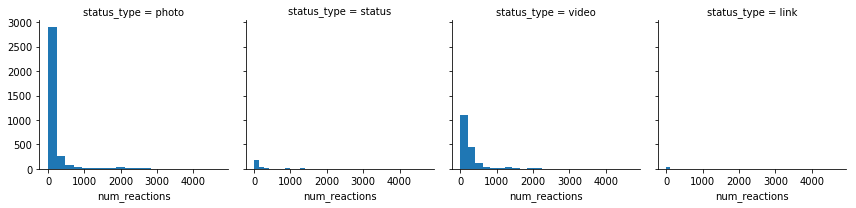

In [124]:
graph = sns.FacetGrid(train, col='status_type')
graph.map(plt.hist, 'num_reactions', bins=20)

In [126]:
train = train.drop('status_id', axis=1)
test = test.drop('status_id', axis=1)

In [172]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['status_type'])
labelEncoder.fit(test['status_type'])
train['status_type'] = labelEncoder.transform(train['status_type'])
test['status_type'] = labelEncoder.transform(test['status_type'])

In [175]:
trainb = seller.sample(frac=0.8,random_state=53)
trainb = trainb.drop('status_id', axis=1)
labelEncoder.fit(trainb['status_type'])
trainb['status_type'] = labelEncoder.transform(trainb['status_type'])
labelEncoder.fit(trainb['status_published'])
trainb['status_published'] = labelEncoder.transform(trainb['status_published'])

In [135]:
train['year'] = train['status_published'].dt.year
train['month'] = train['status_published'].dt.month
train['day'] = train['status_published'].dt.day
train['hour'] = train['status_published'].dt.hour

In [140]:
train = train.drop('status_published', axis=1)

In [143]:
test['year'] = test['status_published'].dt.year
test['month'] = test['status_published'].dt.month
test['day'] = test['status_published'].dt.day
test['hour'] = test['status_published'].dt.hour

In [144]:
test = test.drop('status_published', axis=1)

In [145]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 9 to 7047
Data columns (total 14 columns):
status_type      1410 non-null int32
num_reactions    1410 non-null int64
num_comments     1410 non-null int64
num_shares       1410 non-null int64
num_likes        1410 non-null int64
num_loves        1410 non-null int64
num_wows         1410 non-null int64
num_hahas        1410 non-null int64
num_sads         1410 non-null int64
num_angrys       1410 non-null int64
year             1410 non-null int64
month            1410 non-null int64
day              1410 non-null int64
hour             1410 non-null int64
dtypes: int32(1), int64(13)
memory usage: 159.7 KB


###### train.info()

In [171]:
x_array =  np.array(train)
x_array

array([   1,  304,   13,    0,  294,    9,    1,    0,    0,    0, 2016,
         12,    2,    1,    0], dtype=int64)

In [149]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[3.33333333e-01, 1.46496815e-01, 4.76417342e-04, ...,
        1.81818182e-01, 1.00000000e-01, 3.91304348e-01],
       [3.33333333e-01, 6.45435244e-02, 6.19342544e-04, ...,
        1.00000000e+00, 3.33333333e-02, 4.34782609e-02],
       [3.33333333e-01, 2.12314225e-02, 1.42925202e-04, ...,
        1.81818182e-01, 1.00000000e+00, 1.73913043e-01],
       ...,
       [0.00000000e+00, 1.27388535e-03, 0.00000000e+00, ...,
        3.63636364e-01, 8.66666667e-01, 1.00000000e+00],
       [3.33333333e-01, 1.74097665e-02, 3.81133873e-04, ...,
        6.36363636e-01, 5.66666667e-01, 4.78260870e-01],
       [3.33333333e-01, 3.16348195e-02, 8.57551215e-04, ...,
        9.09090909e-02, 6.33333333e-01, 1.00000000e+00]])

In [198]:
#--- Menentukan dan mengkonfigurasi fungsi kmeans ---
kmeans = KMeans(n_clusters = 2, random_state=32)
#--- Menentukan kluster dari data ---
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=32, tol=0.0001, verbose=0)

In [199]:
#--- Menampilkan pusat cluster ---
print(kmeans.cluster_centers_)

[[1.67185520e+00 2.21976833e+02 1.21076923e+02 3.02733032e+01
  2.09507692e+02 1.05934842e+01 1.01828054e+00 5.60180995e-01
  1.95113122e-01 9.97285068e-02 2.01634027e+03 6.60054299e+00
  1.58485068e+01 7.81628959e+00 1.31004525e+00]
 [2.98260870e+00 5.13634783e+02 5.24048696e+03 4.77617391e+02
  3.94182609e+02 1.01495652e+02 6.79130435e+00 7.76521739e+00
  2.47826087e+00 9.21739130e-01 2.01735652e+03 7.44347826e+00
  1.53826087e+01 8.71304348e+00 1.95652174e+00]]


In [200]:
#--- Menampilkan Hasil Kluster ---
print(kmeans.labels_)
#--- Menambahkan Kolom "kluster" Dalam Data Frame Driver ---
train["kluster"] = kmeans.labels_

[0 0 0 ... 0 0 0]


In [201]:
train['kluster'][40:60]

4703    0
7017    0
2277    0
2494    0
4794    0
4358    0
6479    0
39      0
5867    0
3122    0
6199    0
5130    0
3611    0
6409    0
4041    0
6355    0
5461    0
2473    0
4360    0
992     0
Name: kluster, dtype: int32

In [202]:
testData = x_array[40:60]
kmeans.predict(testData)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

ValueError: 'c' argument has 5640 elements, which is not acceptable for use with 'x' with size 20, 'y' with size 20.

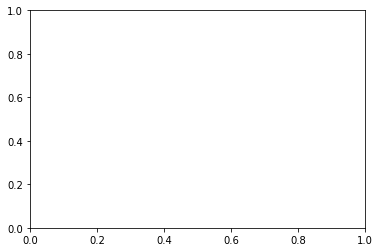

In [212]:
#--- Memvisualkan hasil kluster ---
output = plt.scatter(testData[:,0], testData[:,1], s = 100, c = train.kluster, marker = "o")
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [177]:
trainb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5640 entries, 362 to 3098
Data columns (total 11 columns):
status_type         5640 non-null int32
status_published    5640 non-null int64
num_reactions       5640 non-null int64
num_comments        5640 non-null int64
num_shares          5640 non-null int64
num_likes           5640 non-null int64
num_loves           5640 non-null int64
num_wows            5640 non-null int64
num_hahas           5640 non-null int64
num_sads            5640 non-null int64
num_angrys          5640 non-null int64
dtypes: int32(1), int64(10)
memory usage: 506.7 KB


In [178]:
b_array =  np.array(trainb)
b_array

array([[   1, 1865,  690, ...,    0,    0,    0],
       [   1, 1740,  304, ...,    0,    0,    0],
       [   1, 1905,  100, ...,    0,    0,    0],
       ...,
       [   0, 5157,    6, ...,    0,    0,    0],
       [   1, 2252,   82, ...,    0,    1,    0],
       [   1, 4044,  149, ...,    0,    0,    0]], dtype=int64)

In [179]:
kmeans = KMeans(n_clusters = 4, random_state=32)
kmeans.fit(trainb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=32, tol=0.0001, verbose=0)

In [180]:
print(kmeans.cluster_centers_)

[[1.44187270e+00 9.46280905e+02 3.61492898e+02 1.81136244e+01
  3.87427670e+00 3.58885324e+02 2.05470805e+00 2.93529721e-01
  9.20568122e-02 1.53077328e-01 1.10468175e-02]
 [1.82117389e+00 4.64349918e+03 2.08787164e+02 2.03933626e+02
  5.73494240e+01 1.84882611e+02 1.98897422e+01 2.32967636e+00
  1.21777290e+00 2.73724630e-01 1.93636862e-01]
 [2.98113208e+00 3.33101887e+03 5.15283019e+02 5.44749057e+03
  4.70632075e+02 3.98933962e+02 9.98018868e+01 5.26415094e+00
  7.83018868e+00 2.52830189e+00 9.24528302e-01]
 [1.76961326e+00 2.82522486e+03 9.00845304e+01 1.59097790e+02
  3.33624309e+01 7.80618785e+01 1.07497238e+01 5.76795580e-01
  4.21546961e-01 1.68508287e-01 1.02209945e-01]]


In [194]:
print(kmeans.labels_)
trainb["kluster"] = kmeans.labels_

[0 0 3 ... 1 3 1]


In [196]:
trainb

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,kluster
362,1,1865,690,10,0,667,21,2,0,0,0,0
495,1,1740,304,13,0,294,9,1,0,0,0,0
319,1,1905,100,3,0,99,1,0,0,0,0,3
6765,2,2439,239,250,1,231,4,0,0,4,0,3
5193,3,4795,138,321,149,85,51,2,0,0,0,1
4291,3,3124,1,0,0,1,0,0,0,0,0,3
2948,2,4461,150,45,0,143,4,3,0,0,0,1
5640,1,3557,46,2,2,45,1,0,0,0,0,3
3911,1,4514,186,19,1,174,5,7,0,0,0,1
2215,1,358,18,3,0,18,0,0,0,0,0,0


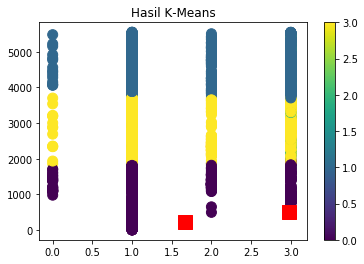

In [211]:
#--- Memvisualkan hasil kluster ---
output = plt.scatter(b_array[:,0], b_array[:,1], s = 100, c = trainb.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil K-Means")
plt.colorbar (output)
plt.show()

In [208]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=32, tol=0.0001, verbose=0)

In [210]:
sns.scatterplot(trainb,trainb)

ValueError: If using all scalar values, you must pass an index